<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/Weights_and_Bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lets Make a Traditional Program

In [1]:
celsius = [-40, -10,  0,  8, 15, 22,  38]

In [2]:
def cel_to_far(c):
  f = c * (9/5) + 32
  return f

In [5]:

fahrenheit = []
for i in celsius:
  fahrenheit.append(cel_to_far(i))

print(fahrenheit)

[-40.0, 14.0, 32.0, 46.4, 59.0, 71.6, 100.4]


In [6]:
for i,c in enumerate(celsius):
  print(c,"degrees Celsius = ", fahrenheit[i],"degrees Fahrenheit")

-40 degrees Celsius =  -40.0 degrees Fahrenheit
-10 degrees Celsius =  14.0 degrees Fahrenheit
0 degrees Celsius =  32.0 degrees Fahrenheit
8 degrees Celsius =  46.4 degrees Fahrenheit
15 degrees Celsius =  59.0 degrees Fahrenheit
22 degrees Celsius =  71.6 degrees Fahrenheit
38 degrees Celsius =  100.4 degrees Fahrenheit


##Lets Do the Job

So we have the input and the output. Our Algorithm or formula is f=c*(9/5)+32. Lets make a Nural Network which can detect the algorithm with our inputdata (<i>celsius</i>) and outputdata (<i>fahrenheit</i>).



In [12]:
import numpy as np

Make Numpy Dataset

In [13]:
celsius_in = np.array(celsius,  dtype=float)
fahrenheit_out = np.array(fahrenheit,  dtype=float)

## Create the model

In [7]:
import tensorflow as tf
#import logging
#logger = tf.get_logger()
#logger.setLevel(logging.ERROR)

### Build a layer

We'll call the layer <font color="coral">`l0`</font> and create it by instantiating <font color="coral">`tf.keras.layers.Dense`</font> with the following configuration:

*   <font color="coral">`input_shape=[1]`</font> — This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. The single value is a floating point number, representing degrees Celsius.

*    <font color="coral">`units=1`</font> — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem . Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the layer would need to match the <font color="coral">`input_shape`</font> of the next layer.)

In [37]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

### Assemble layers into the model


Once layers are defined, they need to be assembled into a model. The Sequential model definition takes a list of layers as an argument, specifying the calculation order from the input to the output.

This model has just a single layer, l0.

In [38]:
model = tf.keras.Sequential([l0])

#model = tf.keras.Sequential(
#    tf.keras.layers.Dense(units=1, input_shape=[1])
#)"""

## Compile the model, with loss and optimizer functions

Before training, the model has to be compiled. When compiled for training, the model is given:

- **Loss function** — A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss".)

- **Optimizer function** — A way of adjusting internal values in order to reduce the loss.


In [39]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

These are used during training (`model.fit()`, below) to first calculate the loss at each point, and then improve it. In fact, the act of calculating the current loss of a model and then improving it is precisely what training is.

During training, the optimizer function is used to calculate adjustments to the model's internal variables. The goal is to adjust the internal variables until the model (which is really a math function) mirrors the actual equation for converting Celsius to Fahrenheit.

TensorFlow uses numerical analysis to perform this tuning, and all this complexity is hidden from you so we will not go into the details here. What is useful to know about these parameters are:

The loss function ([mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error)) and the optimizer ([Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)) used here are standard for simple models like this one, but many others are available. It is not important to know how these specific functions work at this point.

One part of the Optimizer you may need to think about when building your own models is the learning rate (`0.1` in the code above). This is the step size taken when adjusting values in the model. If the value is too small, it will take too many iterations to train the model. Too large, and accuracy goes down. Finding a good value often involves some trial and error, but the range is usually within 0.001 (default), and 0.1

## Train the model

Train the model by calling the `fit` method.

During training, the model takes in Celsius values, performs a calculation using the current internal variables (called "weights") and outputs values which are meant to be the Fahrenheit equivalent. Since the weights are initially set randomly, the output will not be close to the correct value. The difference between the actual output and the desired output is calculated using the loss function, and the optimizer function directs how the weights should be adjusted.

This cycle of calculate, compare, adjust is controlled by the `fit` method. The first argument is the inputs, the second argument is the desired outputs. The `epochs` argument specifies how many times this cycle should be run, and the `verbose` argument controls how much output the method produces.

In [40]:
%%time
history = model.fit(celsius_in, fahrenheit_out, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model
CPU times: user 1.86 s, sys: 66.2 ms, total: 1.92 s
Wall time: 1.69 s


## Display training statistics

The `fit` method returns a history object. We can use this object to plot how the loss of our model goes down after each training epoch. A high loss means that the Fahrenheit degrees the model predicts is far from the corresponding value in `fahrenheit_a`.

We'll use [Matplotlib](https://matplotlib.org/) to visualize this (you could use another tool). As you can see, our model improves very quickly at first, and then has a steady, slow improvement until it is very near "perfect" towards the end.


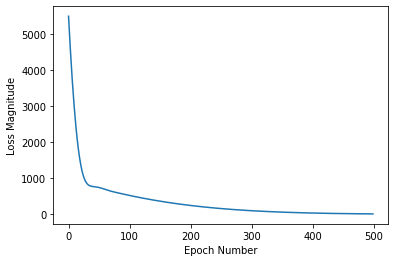

In [41]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

## Use the model to predict values

In [42]:
print(model.predict([100.0]))

1/1 [==============================] - 0s 55ms/step
[[211.54779]]


#Actual Value

In [43]:
cel_to_far(100.0)

212.0

## Looking at the layer weights and bias

In [46]:
print("These are the layer variables, weight:",l0.get_weights()[0],", bias:",l0.get_weights()[1])

These are the layer variables, weight: [[1.8281387]] , bias: [28.733923]




---

---





In [68]:
import random


celsius_2 = []
fahrenheit_2=[]

for i in range(500):
  c_scaled=  float("{:.2f}".format(random.uniform(-10.5, 75)))
  celsius_2.append(c_scaled)
  f_scaled = float("{:.2f}".format(cel_to_far(c_scaled)))
  fahrenheit_2.append(f_scaled)


In [69]:
for i,c in enumerate(celsius_2):
  print(c,"degrees Celsius = ", fahrenheit_2[i],"degrees Fahrenheit")

11.7 degrees Celsius =  53.06 degrees Fahrenheit
48.66 degrees Celsius =  119.59 degrees Fahrenheit
53.7 degrees Celsius =  128.66 degrees Fahrenheit
30.81 degrees Celsius =  87.46 degrees Fahrenheit
8.45 degrees Celsius =  47.21 degrees Fahrenheit
24.14 degrees Celsius =  75.45 degrees Fahrenheit
61.54 degrees Celsius =  142.77 degrees Fahrenheit
-9.96 degrees Celsius =  14.07 degrees Fahrenheit
54.72 degrees Celsius =  130.5 degrees Fahrenheit
65.66 degrees Celsius =  150.19 degrees Fahrenheit
62.52 degrees Celsius =  144.54 degrees Fahrenheit
45.39 degrees Celsius =  113.7 degrees Fahrenheit
3.14 degrees Celsius =  37.65 degrees Fahrenheit
66.25 degrees Celsius =  151.25 degrees Fahrenheit
0.76 degrees Celsius =  33.37 degrees Fahrenheit
63.41 degrees Celsius =  146.14 degrees Fahrenheit
25.51 degrees Celsius =  77.92 degrees Fahrenheit
2.93 degrees Celsius =  37.27 degrees Fahrenheit
44.93 degrees Celsius =  112.87 degrees Fahrenheit
-2.51 degrees Celsius =  27.48 degrees Fahrenhei

In [70]:
celsius_in = np.array(celsius_2,  dtype=float)
fahrenheit_out = np.array(fahrenheit_2,  dtype=float)

In [71]:
%%time



l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

model = tf.keras.Sequential([l0])

model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))


history = model.fit(celsius_in, fahrenheit_out, epochs=500, verbose=False)
print("Finished training the model")


print("These are the layer variables, weight:",l0.get_weights()[0],", bias:",l0.get_weights()[1])

Finished training the model
These are the layer variables, weight: [[1.8005284]] , bias: [32.001602]
CPU times: user 12.1 s, sys: 669 ms, total: 12.8 s
Wall time: 10.7 s


In [72]:
print("For 100.0 Celsius: ",model.predict([100.0]))

1/1 [==============================] - 0s 83ms/step
For 100.0 Celsius:  [[212.05444]]


In [73]:
cel_to_far(100.0)

212.0



---



---



In [78]:
%%time
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)

model = tf.keras.Sequential([l0, l1, l2])

model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

model.fit(celsius_in, fahrenheit_out, epochs=500, verbose=False)
print("Finished training the model")



Finished training the model
CPU times: user 13 s, sys: 752 ms, total: 13.8 s
Wall time: 21.3 s


In [79]:
print(model.predict([100.0]))

1/1 [==============================] - 0s 86ms/step
[[211.98354]]


In [80]:
cel_to_far(100.0)

212.0

In [83]:
print("These are the l0 variables, weight:",l0.get_weights()[0],", bias:",l0.get_weights()[1])

These are the l0 variables, weight: [[-0.70468706  0.26312506 -0.29506013 -0.04036593]] , bias: [-5.732731   5.51682    2.6405303 -6.0521836]


In [84]:
print("These are the l1 variables, weight:",l1.get_weights()[0],", bias:",l1.get_weights()[1])

These are the l1 variables, weight: [[-0.7863478  -1.2415843  -0.7621713  -0.16364685]
 [ 1.7175612  -0.2360942   0.03547899  0.46868035]
 [-0.47344595 -0.21625951 -0.7995037  -0.81295997]
 [-0.67148477  0.00742646  0.6318878  -0.23829411]] , bias: [-1.7163306  8.336361  -5.1230664  5.596765 ]


In [85]:
print("These are the l2 variables, weight:",l2.get_weights()[0],", bias:",l2.get_weights()[1])

These are the l2 variables, weight: [[0.6034647 ]
 [0.8293106 ]
 [0.22269538]
 [0.4031512 ]] , bias: [9.7255335]
